<a href="https://colab.research.google.com/github/douglascam/Google-Colab/blob/main/processo_seletivo_myra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação das Bibliotecas

In [3]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 16.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=f7b7d1e6209d6a0e6634ee3c697ced5da4e3ae2605ebe1722fc7ae25949e3e5d
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


# Import das Dependências

In [12]:
import pyspark
import pandas
from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
from pyspark.sql import functions as F
from pyspark import SparkContext,SQLContext,SparkFiles
from zipfile import ZipFile
from pyspark.sql.functions import *
import matplotlib.pyplot as  plt
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sql = SQLContext(sc)



/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


# Download dos arquivos

In [13]:
url1 = "https://raw.githubusercontent.com/douglascam/Google-Colab/main/olist_orders_dataset.csv"
url2 = "https://raw.githubusercontent.com/douglascam/Google-Colab/main/olist_order_reviews_dataset.csv"
url3 = "https://raw.githubusercontent.com/douglascam/Google-Colab/main/olist_order_items_dataset.csv"
url4 = "https://raw.githubusercontent.com/douglascam/Google-Colab/main/olist_products_dataset.csv"
sc.addFile(url1)
sc.addFile(url2)
sc.addFile(url3)
sc.addFile(url4)

# Gerar os respectivos dataframes dos arquivos baixados

In [18]:

olist_orders_dataset = spark.read.csv(SparkFiles.get("olist_orders_dataset.csv"), header=True)
olist_order_reviews_dataset = spark.read.csv(SparkFiles.get("olist_order_reviews_dataset.csv"), header=True)
olist_order_items_dataset = spark.read.csv(SparkFiles.get("olist_order_items_dataset.csv"), header=True)
olist_products_dataset = spark.read.csv(SparkFiles.get("olist_products_dataset.csv"), header=True)

display(olist_orders_dataset.head())
display(olist_order_reviews_dataset.head())
display(olist_order_items_dataset.head())
display(olist_products_dataset.head())

Row(order_id='e481f51cbdc54678b7cc49136f2d6af7', customer_id='9ef432eb6251297304e76186b10a928d', order_status='delivered', order_purchase_timestamp='2017-10-02 10:56:33', order_approved_at='2017-10-02 11:07:15', order_delivered_carrier_date='2017-10-04 19:55:00', order_delivered_customer_date='2017-10-10 21:25:13', order_estimated_delivery_date='2017-10-18 00:00:00')

Row(review_id='7bc2406110b926393aa56f80a40eba40', order_id='73fc7af87114b39712e6da79b0a377eb', review_score='4', review_comment_title=None, review_comment_message=None, review_creation_date='2018-01-18 00:00:00', review_answer_timestamp='2018-01-18 21:46:59')

Row(order_id='00010242fe8c5a6d1ba2dd792cb16214', order_item_id='1', product_id='4244733e06e7ecb4970a6e2683c13e61', seller_id='48436dade18ac8b2bce089ec2a041202', shipping_limit_date='2017-09-19 09:45:35', price='58.90', freight_value='13.29')

Row(product_id='1e9e8ef04dbcff4541ed26657ea517e5', product_category_name='perfumaria', product_name_lenght='40', product_description_lenght='287', product_photos_qty='1', product_weight_g='225', product_length_cm='16', product_height_cm='10', product_width_cm='14')

# Contar a quantidade de linhas de cada um dos datasets acima

In [19]:
display(olist_orders_dataset.count())
display(olist_order_reviews_dataset.count())
display(olist_order_items_dataset.count())
display(olist_products_dataset.count())

99441

104162

112650

32951

# Com base nos arquivos acima considere consolidá-los em um único dataframe (sem repetição de
colunas). (JOINS)

In [20]:
DFConsolidado_order = olist_orders_dataset.join(olist_order_reviews_dataset,['order_id']) 
DFConsolidado_product = olist_order_items_dataset.join(olist_products_dataset,['product_id'])
DFConsolidado_total = DFConsolidado_product.join(DFConsolidado_order,['order_id'])
DFConsolidado_total.show()



+--------------------+--------------------+-------------+--------------------+-------------------+------+-------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+
|            order_id|          product_id|order_item_id|           seller_id|shipping_limit_date| price|freight_value|product_category_name|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|product_length_cm|product_height_cm|product_width_cm|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_

#Com base no novo dataset consolidado responda as perguntas abaixo:

* Total de linhas

In [21]:
display(DFConsolidado_total.count())

112372

* Total de linhas por product_category_name

In [22]:
DFConsolidado_total.groupBy('product_category_name').count().sort(desc("count")).show(10)

+---------------------+-----+
|product_category_name|count|
+---------------------+-----+
|      cama_mesa_banho|11137|
|         beleza_saude| 9645|
|        esporte_lazer| 8640|
|     moveis_decoracao| 8331|
| informatica_acess...| 7849|
| utilidades_domest...| 6943|
|   relogios_presentes| 5950|
|            telefonia| 4517|
|   ferramentas_jardim| 4329|
|           automotivo| 4213|
+---------------------+-----+
only showing top 10 rows



# Remover todos os ids (colunas) do dataframe

In [23]:
DFConsolidado_total.drop("order_id","product_id","order_item_id","seller_id","customer_id","review_id").show()

+-------------------+------+-------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+------------+--------------------+----------------------+--------------------+-----------------------+
|shipping_limit_date| price|freight_value|product_category_name|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|product_length_cm|product_height_cm|product_width_cm|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_delivery_date|review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|
+-------------------+------+-------------+---------------------+-------------------+----------------

# Converter coluna review_creation_date para date (sem o tempo)

In [24]:
DFConsolidado_total.withColumn("review_creation_date",to_date(substring(DFConsolidado_total.review_creation_date,1,10),'yyyy-MM-dd')).show()

+--------------------+--------------------+-------------+--------------------+-------------------+------+-------------+---------------------+-------------------+--------------------------+------------------+----------------+-----------------+-----------------+----------------+--------------------+------------+------------------------+-------------------+----------------------------+-----------------------------+-----------------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+
|            order_id|          product_id|order_item_id|           seller_id|shipping_limit_date| price|freight_value|product_category_name|product_name_lenght|product_description_lenght|product_photos_qty|product_weight_g|product_length_cm|product_height_cm|product_width_cm|         customer_id|order_status|order_purchase_timestamp|  order_approved_at|order_delivered_carrier_date|order_delivered_customer_date|order_estimated_

#Crie uma função para converter todo o texto para lower case (tudo minusculo)

In [25]:
@udf
def lower_case(coluna):
  if coluna is not None:
    return coluna.lower()

* Teste da função

In [26]:
DFConsolidado_total.select("review_comment_message",lower_case("review_comment_message")).show()

+----------------------+----------------------------------+
|review_comment_message|lower_case(review_comment_message)|
+----------------------+----------------------------------+
|                  null|                              null|
|       nada a declarar|                   nada a declarar|
|  Ótima compra. Óti...|              ótima compra. óti...|
|                  null|                              null|
|                  null|                              null|
|                  null|                              null|
|             Excelente|                         excelente|
|                  null|                              null|
|  Entregas separada...|              entregas separada...|
|                  null|                              null|
|                  null|                              null|
|                  null|                              null|
|                  null|                              null|
|                  null|                

# Crie uma função para procurar as palavras “Adorei, Eficiente, Confiável” no texto, contendo as mesmas crie uma coluna com a categorização “BOM”

* Como no arquivo de reviews possui poucos registros com as palavras chave solicitadas, adicionei outras opções de critica, para que os gráficos sejam mais detalhados.

In [28]:
@udf
def find_review_positivo(coluna):
  if coluna is not None  and 'Adorei' in coluna:
     return ("BOM")
  elif coluna is not None  and 'adorei' in coluna:
     return ("BOM")
  elif coluna is not None  and 'Eficiente' in coluna:
     return ("BOM")
  elif coluna is not None  and 'eficiente' in coluna:
     return ("BOM")
  elif coluna is not None  and 'Confiável' in coluna:
     return ("BOM")
  elif coluna is not None  and 'Confiavel' in coluna:
     return ("BOM")
  elif coluna is not None  and 'confiável' in coluna:
     return ("BOM")    
  elif coluna is not None  and 'confiavel' in coluna:
     return ("BOM")
  elif coluna is not None  and 'Bom' in coluna:
     return ("BOM")   
  elif coluna is not None  and 'bom' in coluna:
     return ("BOM")   
  elif coluna is not None  and 'Recomendo' in coluna:
     return ("BOM")       
  elif coluna is not None  and 'recomendo' in coluna:
     return ("BOM")   
  elif coluna is not None  and 'ok' in coluna:
     return ("BOM")                
  elif coluna is not None  and 'péssimos' in coluna:
     return ("Péssimo")
  elif coluna is not None  and 'Péssimos' in coluna:
     return ("Péssimo")     
  elif coluna is not None  and 'pessimos' in coluna:
     return ("Péssimo")
  elif coluna is not None  and 'Pessimos' in coluna:
     return ("Péssimo")    
  elif coluna is not None  and 'Não' in coluna:
     return ("Não entregue")    
  elif coluna is not None  and 'não' in coluna:
     return ("Não entregue") 
  elif coluna is not None  and 'Nao' in coluna:
     return ("Não entregue")  
  elif coluna is not None  and 'nao' in coluna:
     return ("Não entregue")                      
  else:
     return ("Outros")

* inserção de uma nova coluna contendo as críticas agrupadas

In [29]:
DFConsolidado_total = DFConsolidado_total.withColumn('review_comment_message_criticado',find_review_positivo("review_comment_message"))

# Faça um count da nova categoria e veja quantas linhas tem a categoria bom e quantas linhas péssimo

In [30]:
DFConsolidado_total.groupBy('review_comment_message_criticado').count().sort(desc("count")).show()

+--------------------------------+-----+
|review_comment_message_criticado|count|
+--------------------------------+-----+
|                          Outros|93173|
|                             BOM|10006|
|                    Não entregue| 9189|
|                         Péssimo|    4|
+--------------------------------+-----+





#Crie um gráfico de pizza e um de barra para ilustrar o resultado acima

* Converter o dataframe de pysaprk para pandas

In [31]:
PDConsolidado_total = DFConsolidado_total.toPandas()

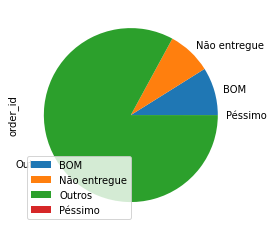

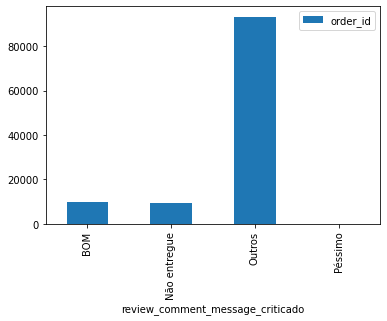

In [32]:
display(PDConsolidado_total.groupby(['review_comment_message_criticado']).count().plot(kind='pie',y='order_id'))
display(PDConsolidado_total.groupby(['review_comment_message_criticado']).count().plot(kind='bar',y='order_id'))

#Faça uma soma da coluna “price” agrupando por product_category_name do top 6 (ordene do maior para o menor)

* Converter o tipo de coluna de "price" de string para double

In [33]:
DFConsolidado_total = DFConsolidado_total.withColumn("price",DFConsolidado_total.price.cast('double'))

In [35]:
DFConsolidado_total.groupBy('product_category_name').sum("price").sort(desc(sum("price"))).show(6)

+---------------------+------------------+
|product_category_name|        sum(price)|
+---------------------+------------------+
|         beleza_saude|1252404.8500000183|
|   relogios_presentes|1197565.4800000114|
|      cama_mesa_banho|1040140.3100000382|
|        esporte_lazer| 986848.9200000222|
| informatica_acess...| 914579.3900000136|
|     moveis_decoracao| 729864.4200000071|
+---------------------+------------------+
only showing top 6 rows



#  Crie um gráfico de barra para ilustrar o resultado acima

* Criar um dataframe pandas de preço

In [36]:
PDConsolidado_price = DFConsolidado_total.groupBy('product_category_name').sum("price").sort(desc(sum("price"))).toPandas()
PDConsolidado_price = PDConsolidado_price.head(6)
PDConsolidado_price.head()

,product_category_name,sum(price)
0,beleza_saude,1252404.85
1,relogios_presentes,1197565.48
2,cama_mesa_banho,1040140.31
3,esporte_lazer,986848.92
4,informatica_acessorios,914579.39


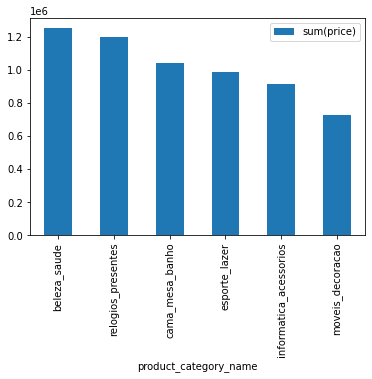

In [37]:
PDConsolidado_price.plot.bar(x = 'product_category_name', y = 'sum(price)')